In [21]:
import pandas as pd
import requests
from StringIO import StringIO
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns


r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vRUQqfvGcv5-KrgYuLynYUBwrjRztlP2pJlSZK-QFX3EcFU18TTQ7vqOAN30fzoBz7eDASkGVIcd0D4/pub?output=csv')
data = r.content
df = pd.read_csv(StringIO(data), parse_dates=['Timestamp'])
df.head()

,Timestamp,Did you vote in the last election?,Do you know who your congressional representative(s) are?,Where would you consider yourself on the political spectrum?,What factors are most important in your selection of a candidate? (select all that apply)
0,2017-09-24 11:35:55,Yes,Yes,Left,"Overall political philosophy, Stance on a key ..."
1,2017-09-27 18:40:11,Yes,Yes,Mostly Left,"Overall political philosophy, Stance on a key ..."
2,2017-09-27 18:40:21,Yes,Yes,Mostly Left,Likelihood of executing on world-favorable obj...
3,2017-09-27 18:40:33,Yes,Yes,Left,"Success rate in passing legislation, Overall p..."
4,2017-09-27 18:40:54,Yes,No,Middle of the road,"Success rate in passing legislation, Overall p..."


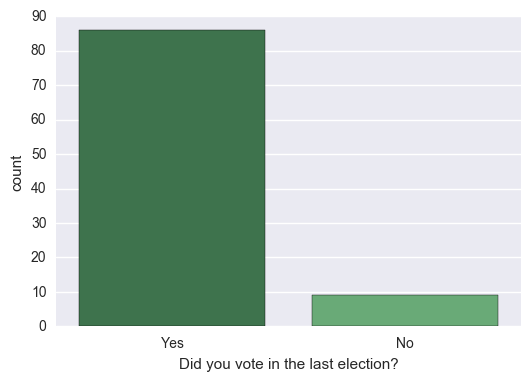

In [30]:
sns.countplot(x="Did you vote in the last election?", data=df, palette="Greens_d");

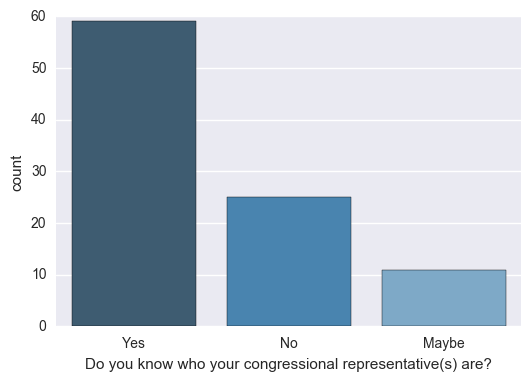

In [33]:
sns.countplot(x='Do you know who your congressional representative(s) are?', data=df, palette="Blues_d");

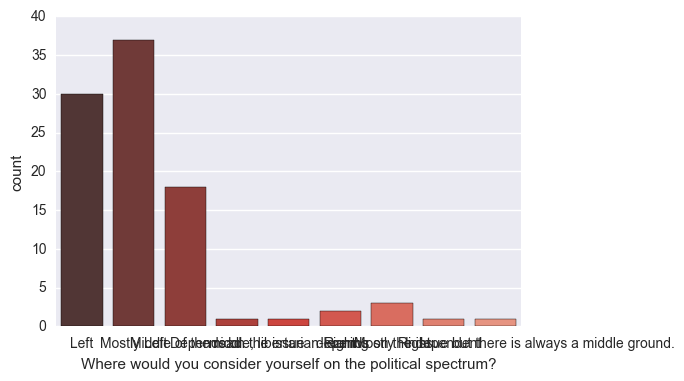

In [41]:
sns.countplot(x='Where would you consider yourself on the political spectrum?', data=df, palette="Reds_d");

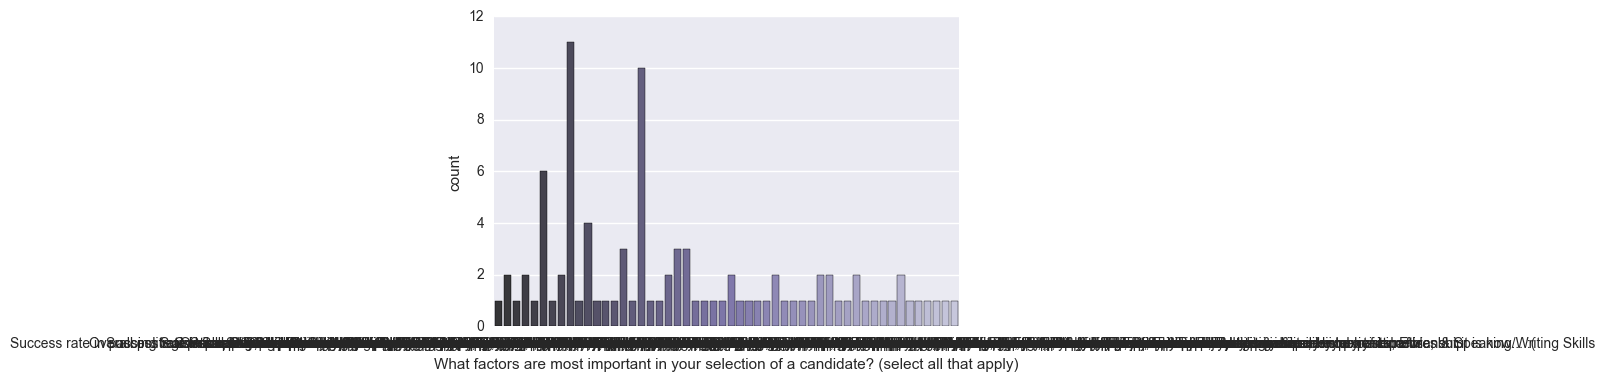

In [40]:
sns.countplot(x='What factors are most important in your selection of a candidate? (select all that apply)', data=df, palette="Purples_d");